In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

Выбраны дневные котировки акций «Роснефть» за период с 4 января 2023 года по 16 апреля 2024 года.

In [ ]:
df = pd.read_excel('/content/данные_дз (1).xlsx', sheet_name='данные')
df.head(3)

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,ариф,геом
0,ROSN,D,2023-01-04,0,368.05,NaN,NaN
1,ROSN,D,2023-01-05,0,365.80,-0.006113,-0.006132
2,ROSN,D,2023-01-06,0,367.50,0.004647,0.004637


In [ ]:
x = df['<CLOSE>']
x[:3]

0    368.05
1    365.80
2    367.50
Name: <CLOSE>, dtype: float64

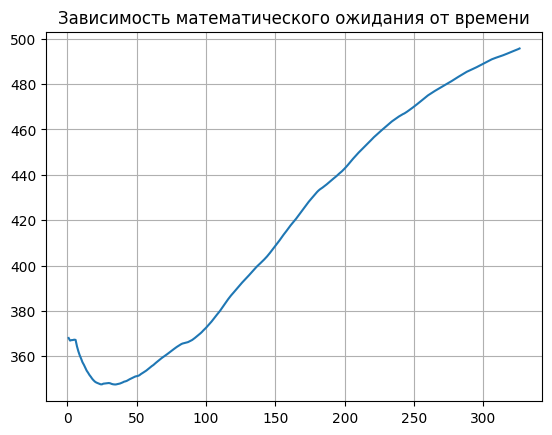

In [ ]:
# вычисляем математическое ожидание для каждого временного шага
means = np.array([x[:i].mean() for i in range(1, x.size + 1)])

# строим график
plt.plot(np.arange(1, x.size + 1), means)
plt.title('Зависимость математического ожидания от времени')
plt.grid()
plt.show()

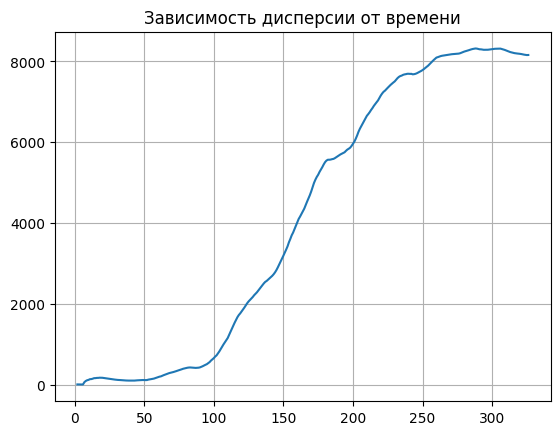

In [ ]:
# вычисляем дисперсию для каждого временного шага
variances = np.array([x[:i].var() for i in range(1, x.size + 1)])

# строим график
plt.plot(np.arange(1, x.size + 1), variances)
plt.title('Зависимость дисперсии от времени')
plt.grid()
plt.show()

In [ ]:
# логарифмическая доходность
x_log = df['геом'][1:]
x_log

1     -0.006132
2      0.004637
3     -0.000544
4      0.001768
5     -0.003267
         ...   
321   -0.010675
322    0.008409
323    0.003570
324    0.001563
325    0.023331
Name: геом, Length: 325, dtype: float64

In [ ]:
# арифмитическая доходность
x_arif = df['ариф'][1:]
x_arif

1     -0.006113
2      0.004647
3     -0.000544
4      0.001770
5     -0.003261
         ...   
321   -0.010618
322    0.008445
323    0.003576
324    0.001565
325    0.023605
Name: ариф, Length: 325, dtype: float64

Для логарифмической доходности:

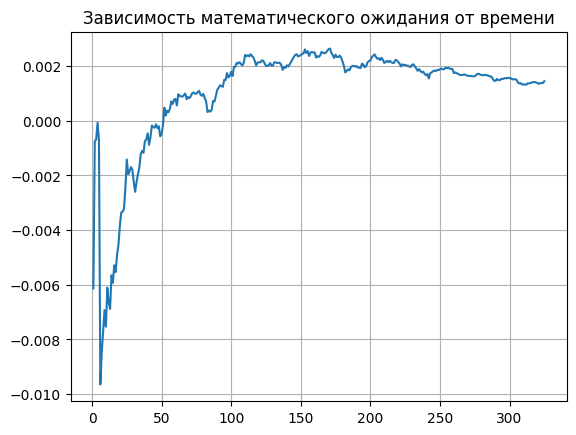

In [ ]:
# вычисляем математическое ожидание для каждого временного шага
means = np.array([x_log[:i].mean() for i in range(1, x_log.size + 1)])

# строим график
plt.plot(np.arange(1, x_log.size + 1), means)
plt.title('Зависимость математического ожидания от времени')
plt.grid()
plt.show()

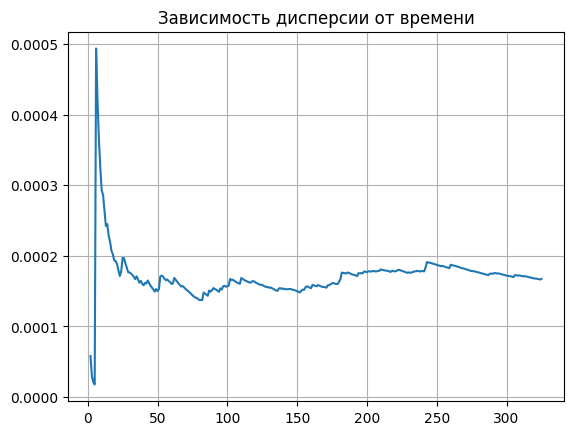

In [ ]:
# вычисляем дисперсию для каждого временного шага
variances = np.array([x_log[:i].var() for i in range(1, x_log.size + 1)])

# строим график
plt.plot(np.arange(1, x_log.size + 1), variances)
plt.title('Зависимость дисперсии от времени')
plt.grid()
plt.show()

Для арифметической доходности:

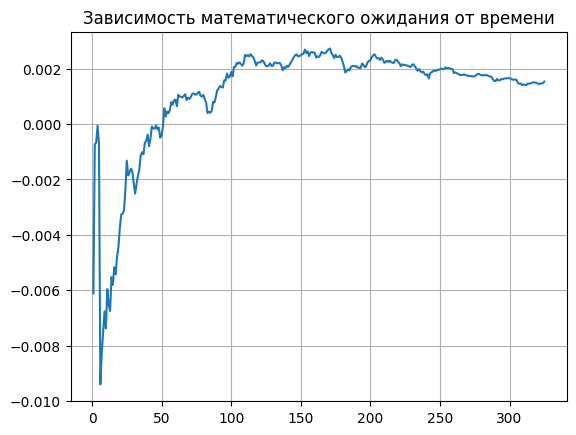

In [ ]:
# вычисляем математическое ожидание для каждого временного шага
means = np.array([x_arif[:i].mean() for i in range(1, x_arif.size + 1)])

# строим график
plt.plot(np.arange(1, x_arif.size + 1), means)
plt.title('Зависимость математического ожидания от времени')
plt.grid()
plt.show()

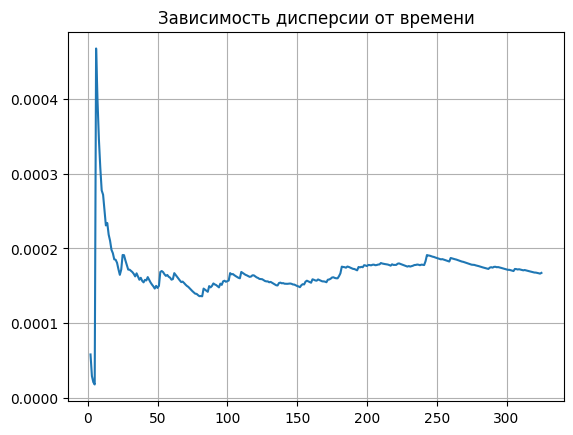

In [ ]:
# вычисляем дисперсию для каждого временного шага
variances = np.array([x_arif[:i].var() for i in range(1, x_arif.size + 1)])

# строим график
plt.plot(np.arange(1, x_arif.size + 1), variances)
plt.title('Зависимость дисперсии от времени')
plt.grid()
plt.show()

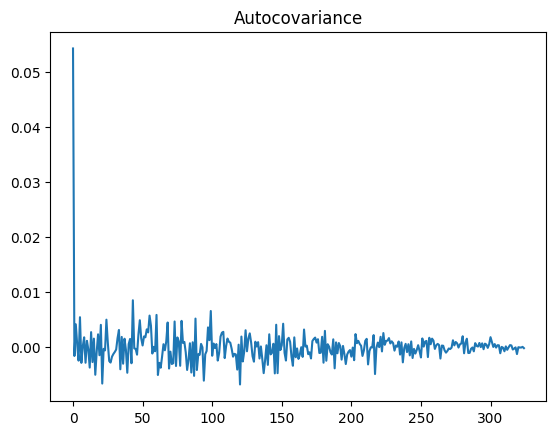

In [ ]:
# вычисляем автоковариацию
autocovariance = np.correlate(x_log - x_log.mean(), x_log - x_log.mean(), mode='full')

# выбираем только вторую половину результата, так как автоковариация симметрична
autocovariance = autocovariance[autocovariance.size // 2:]

# строим график автоковариации
plt.plot(autocovariance)
plt.title('Autocovariance')
plt.show()

In [ ]:
# автоковариация уменьшается и стремится к нулю

<Axes: xlabel='геом', ylabel='Count'>

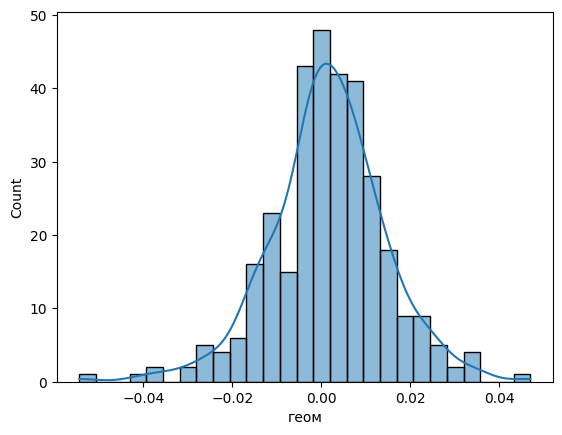

In [ ]:
sns.histplot(x_log, kde=True)

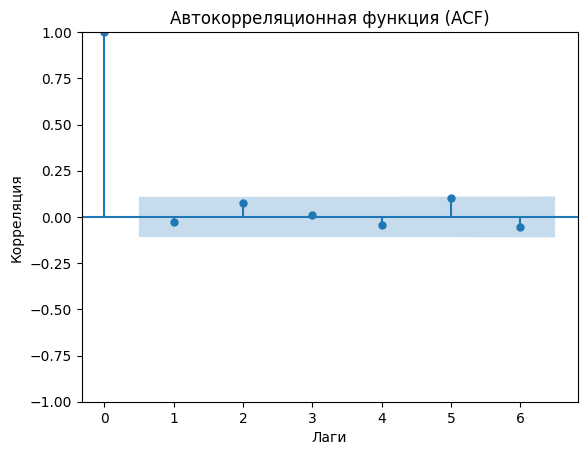

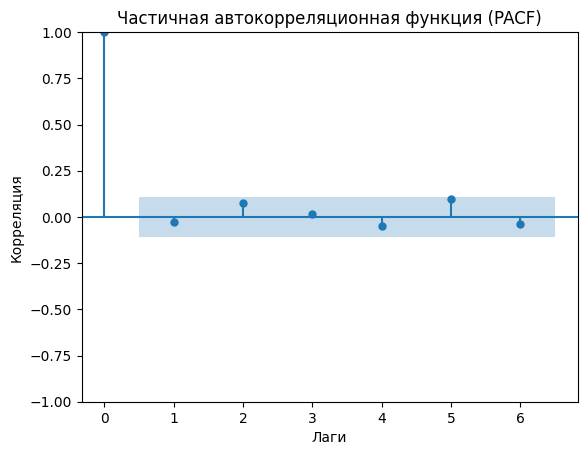

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Построение графиков ACF и PACF

# Визуализация ACF
plot_acf(x_log,  lags=6)
plt.title('Автокорреляционная функция (ACF)')
plt.xlabel('Лаги')
plt.ylabel('Корреляция')
plt.show( )

# Визуализация PACF
plot_pacf(x_log, lags=6, method= 'ywm')
plt.title ('Частичная автокорреляционная функция (PACF)')
plt.xlabel('Лаги')
plt.ylabel('Корреляция')
plt.show()

Теперь построим модели и выберем лучшую.

**Построение и выбор лучшей модели ARMA**

ARMA c применением критерия Акайке

In [ ]:
# максимальный лаг
max_lag = 4

# определяем минимальное значение AIC
best_aic = np.inf

# определяем лучшую модель
best_model = None

# перебираем все возможные комбинации p и q
for p in range(max_lag + 1):
    for q in range(max_lag + 1):
        # игнорируем модель (0, 0, 0)
        if p == 0 and q == 0:
            continue
        # строим модель ARMA
        model = ARIMA(x_log, order=(p, 0, q)).fit()
        AIC = np.log(model.resid.std()**2) + 2*(p+q+1)/len(x_log)
        # проверяем, является ли текущая модель лучшей
        if AIC < best_aic:
            best_aic = AIC
            best_model = model
print(f"Лучшая модель: {best_model.summary()}")
print(best_aic)

Лучшая модель:                                SARIMAX Results                                
Dep. Variable:                   геом   No. Observations:                  325
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 953.540
Date:                Mon, 29 Apr 2024   AIC                          -1899.079
Time:                        14:54:24   BIC                          -1883.944
Sample:                             0   HQIC                         -1893.039
                                - 325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      1.868      0.062   -7.12e-05       0.003
ma.L1         -0.0277      0.050     -0.550      0.582      -0.127       0.071
ma.L2          0.0780      0.057     

In [ ]:
# yt = 0.0014 - 0.0277*ε(t-1) + 0.0780*ε(t-2) + ε(t)

ARMA c применением критерия Шварца

In [ ]:
# максимальный лаг
max_lag = 4

# определяем минимальное значение SBIC
best_BIC = 10**32

# определяем лучшую модель
best_model = None

# перебираем все возможные комбинации p и q
for p in range(max_lag + 1):
    for q in range(max_lag + 1):
        # игнорируем модель (0, 0, 0)
        if p == 0 and q == 0:
            continue
        # строим модель ARMA
        model = ARIMA(x_log, order=(p, 0, q)).fit()
        BIC = np.log(model.resid.std()**2) + np.log(len(x_log))*(p+q+1)/len(x_log)
        # проверяем, является ли текущая модель лучшей
        if BIC < best_BIC:
            best_BIC = BIC
            best_model = model
print(f"Лучшая модель: {best_model.summary()}")
print(best_BIC)

Лучшая модель:                                SARIMAX Results                                
Dep. Variable:                   геом   No. Observations:                  325
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 952.512
Date:                Mon, 29 Apr 2024   AIC                          -1899.024
Time:                        14:56:07   BIC                          -1887.672
Sample:                             0   HQIC                         -1894.493
                                - 325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.009      0.045    3.55e-05       0.003
ar.L1         -0.0295      0.050     -0.590      0.555      -0.128       0.069
sigma2         0.0002   9.82e-06     

In [ ]:
# y_t = 0.0014 - 0.0295y_(y-1) + ε(t)

ARMA c применением критерия Ханнан-Куина

In [ ]:
# максимальный лаг
max_lag = 4

# определяем минимальное значение HQIC
best_HQIC = np.inf

# определяем лучшую модель
best_model = None

# перебираем все возможные комбинации p и q
for p in range(max_lag + 1):
    for q in range(max_lag + 1):
        # игнорируем модель (0, 0, 0)
        if p == 0 and q == 0:
            continue
        # строим модель ARMA
        model = ARIMA(x_log, order=(p, 0, q)).fit()
        HQIC = np.log(model.resid.std()**2) + 2*(p+q+1)*np.log(np.log(len(x_log)))/len(x_log)
        # проверяем, является ли текущая модель лучшей
        if HQIC < best_HQIC:
            best_HQIC = HQIC
            best_model = model


print(f"Лучшая модель: {best_model.summary()}")
print(best_HQIC)

Лучшая модель:                                SARIMAX Results                                
Dep. Variable:                   геом   No. Observations:                  325
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 952.512
Date:                Mon, 29 Apr 2024   AIC                          -1899.024
Time:                        14:57:31   BIC                          -1887.672
Sample:                             0   HQIC                         -1894.493
                                - 325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.009      0.045    3.55e-05       0.003
ar.L1         -0.0295      0.050     -0.590      0.555      -0.128       0.069
sigma2         0.0002   9.82e-06     

In [ ]:
# y_t = 0.0014 - 0.0295y_(y-1) + ε(t)

**Построение и выбор лучшей модели ARIMA**

ARIMA c применением критерия Акайке

In [ ]:
# максимальный лаг
max_lag = 4

# определяем минимальное значение AIC
best_aic = np.inf

# определяем лучшую модель
best_model = None

# перебираем все возможные комбинации p, d и q
for p in range(max_lag + 1):
    for d in range(max_lag + 1):
        for q in range(max_lag + 1):
            # игнорируем модель (0, 0, 0)
            if p == 0 and d == 0 and q == 0:
                continue
            # строим модель ARIMA
            model = ARIMA(x_log, order=(p, d, q)).fit()
            AIC = np.log(model.resid.std()**2) + 2*(p+q+1)/len(x_log)
            # проверяем, является ли текущая модель лучшей
            if AIC < best_aic:
                best_aic = AIC
                best_model = model
print(f"Лучшая модель: {best_model.summary()}")
print(best_aic)

Лучшая модель:                                SARIMAX Results                                
Dep. Variable:                   геом   No. Observations:                  325
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 953.540
Date:                Mon, 29 Apr 2024   AIC                          -1899.079
Time:                        14:59:35   BIC                          -1883.944
Sample:                             0   HQIC                         -1893.039
                                - 325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      1.868      0.062   -7.12e-05       0.003
ma.L1         -0.0277      0.050     -0.550      0.582      -0.127       0.071
ma.L2          0.0780      0.057     

In [ ]:
# yt = 0.0014 - 0.0277*ε(t-1) + 0.0780*ε(t-2) + ε(t)

ARIMA c применением критерия Шварца

In [ ]:
# максимальный лаг
max_lag = 4

# определяем минимальное значение AIC
best_BIC = np.inf

# определяем лучшую модель
best_model = None

# перебираем все возможные комбинации p, d и q
for p in range(max_lag + 1):
    for d in range(max_lag + 1):
        for q in range(max_lag + 1):
            # игнорируем модель (0, 0, 0)
            if p == 0 and d == 0 and q == 0:
                continue
            # строим модель ARIMA
            model = ARIMA(x_log, order=(p, d, q)).fit()
            BIC = np.log(model.resid.std()**2) + np.log(len(x_log))*(p+q+1)/len(x_log)
            # проверяем, является ли текущая модель лучшей
            if BIC < best_BIC:
                best_BIC = BIC
                best_model = model
print(f"Лучшая модель: {best_model.summary()}")
print(best_BIC)

Лучшая модель:                                SARIMAX Results                                
Dep. Variable:                   геом   No. Observations:                  325
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 952.512
Date:                Mon, 29 Apr 2024   AIC                          -1899.024
Time:                        15:02:17   BIC                          -1887.672
Sample:                             0   HQIC                         -1894.493
                                - 325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.009      0.045    3.55e-05       0.003
ar.L1         -0.0295      0.050     -0.590      0.555      -0.128       0.069
sigma2         0.0002   9.82e-06     

In [ ]:
# y_t = 0.0014 - 0.0295y_(y-1) + ε(t)

ARIMA c применением критерия Ханнан-Куина

In [ ]:
# максимальный лаг
max_lag = 4

# определяем минимальное значение AIC
best_HQIC = np.inf

# определяем лучшую модель
best_model = None

# перебираем все возможные комбинации p, d и q
for p in range(max_lag + 1):
    for d in range(max_lag + 1):
        for q in range(max_lag + 1):
            # игнорируем модель (0, 0, 0)
            if p == 0 and d == 0 and q == 0:
                continue
            # строим модель ARIMA
            model = ARIMA(x_log, order=(p, d, q)).fit()
            HQIC = np.log(model.resid.std()**2) + 2*(p+q+1)*np.log(np.log(len(x_log)))/len(x_log)
            # проверяем, является ли текущая модель лучшей
            if HQIC < best_HQIC:
                best_HQIC = HQIC
                best_model = model
print(f"Лучшая модель: {best_model.summary()}")
print(best_HQIC)

Лучшая модель:                                SARIMAX Results                                
Dep. Variable:                   геом   No. Observations:                  325
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 952.512
Date:                Mon, 29 Apr 2024   AIC                          -1899.024
Time:                        15:05:28   BIC                          -1887.672
Sample:                             0   HQIC                         -1894.493
                                - 325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.009      0.045    3.55e-05       0.003
ar.L1         -0.0295      0.050     -0.590      0.555      -0.128       0.069
sigma2         0.0002   9.82e-06     

In [ ]:
# y_t = 0.0014 - 0.0295y_(y-1) + ε(t)

**Построение и выбор лучшей модели SARIMA**

Проверим временной ряд на наличие сезонности:


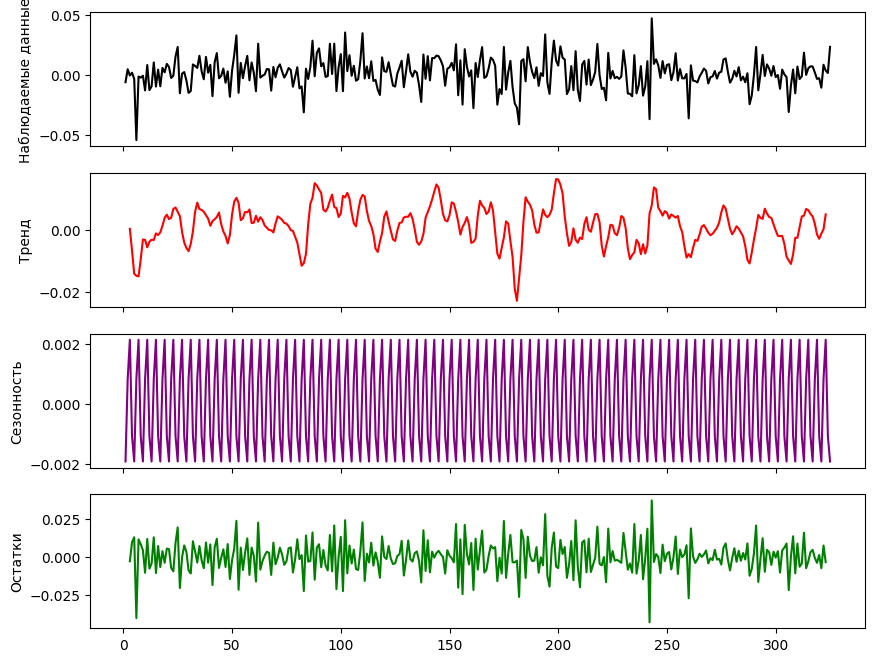

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
y = pd.DataFrame(x_log)
result = seasonal_decompose(y, model='additive', period=4)
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
result.observed.plot(ax=axes[0], legend=False, color='black')
axes[0].set_ylabel('Наблюдаемые данные')
result.trend.plot(ax=axes[1], legend=False, color='red')
axes[1].set_ylabel('Тренд')
result.seasonal.plot(ax=axes[2], legend=False, color='purple')
axes[2].set_ylabel('Сезонность')
result.resid.plot(ax=axes[3], legend=False, color='green')
axes[3].set_ylabel('Остатки')
plt.show()

Наблюдаются частые колебания, это указывает на сезонность. Для точного определения сезонности в данных, вы попробуем разные значения s в модели SARIMA и выбререм ту модель, которая дает наилучшее качество прогноза на основе критериев, таких как AIC или BIC, HQIC.

Вручную подобраны модели с лучшими показателями:

In [ ]:
# параметры модели
p = 0
d = 0  # ряд стационарен
q = 2
P = 0
D = 1
Q = 0
s = 12  # сезонность по месяцам

# Построение модели
model = SARIMAX(x_log, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
AIC = np.log(model.resid.std()**2) + 2*(p + d + q + P + D + Q + 1)/len(x_log)
BIC = np.log(model.resid.std()**2) + np.log(len(x_log))*(p + d + q + P + D + Q + 1)/len(x_log)
HQIC = np.log(model.resid.std()**2) + 2*(p + d + q + P + D + Q + 1)*np.log(np.log(len(x_log)))/len(x_log)
# Результаты
print(model.summary())
print(AIC)
print(BIC)
print(HQIC)

                                      SARIMAX Results                                      
Dep. Variable:                                геом   No. Observations:                  325
Model:             SARIMAX(0, 0, 2)x(0, 1, [], 12)   Log Likelihood                 800.251
Date:                             Mon, 29 Apr 2024   AIC                          -1594.503
Time:                                     19:07:20   BIC                          -1583.264
Sample:                                          0   HQIC                         -1590.011
                                             - 325                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0441      0.052     -0.851      0.395      -0.146       0.057
ma.L2          0.0830      

In [ ]:
# параметры модели
p = 1
d = 0  # ряд стационарен
q = 0
P = 0
D = 1
Q = 0
s = 12  # сезонность по месяцам

# Построение модели
model = SARIMAX(x_log, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()
AIC = np.log(model.resid.std()**2) + 2*(p + d + q + P + D + Q + 1)/len(x_log)
BIC = np.log(model.resid.std()**2) + np.log(len(x_log))*(p + d + q + P + D + Q + 1)/len(x_log)
HQIC = np.log(model.resid.std()**2) + 2*(p + d + q + P + D + Q + 1)*np.log(np.log(len(x_log)))/len(x_log)
# Результаты
print(model.summary())
print(AIC)
print(BIC)
print(HQIC)

                                     SARIMAX Results                                      
Dep. Variable:                               геом   No. Observations:                  325
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 799.150
Date:                            Mon, 29 Apr 2024   AIC                          -1594.299
Time:                                    19:07:30   BIC                          -1586.807
Sample:                                         0   HQIC                         -1591.305
                                            - 325                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0527      0.052     -1.007      0.314      -0.155       0.050
sigma2         0.0004   2.21e-05   